In [ ]:
# !gdown https://drive.google.com/uc?id=1RwzHkTws7sJ-tAVDFWrnSQofcz1bGFTn
!gdown 1ueMigymoLzHMtopYTJXemtM11dquETHu

Downloading...
From: https://drive.google.com/uc?id=1ueMigymoLzHMtopYTJXemtM11dquETHu
To: /content/training_sentence_csv.csv
100% 17.9M/17.9M [00:00<00:00, 148MB/s]


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
!nvidia-smi

Fri Dec 16 08:17:48 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    58W / 400W |      0MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install torch==1.7.1+cu110 torchvision==0.8.2+cu110 -f https://download.pytorch.org/whl/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |███████████████████████         | 834.1 MB 1.2 MB/s eta 0:04:31tcmalloc: large alloc 1147494400 bytes == 0x39dfe000 @  0x7f8c41584615 0x5d6f4c 0x51edd1 0x51ef5b 0x4f750a 0x4997a2 0x4fd8b5 0x4997c7 0x4fd8b5 0x49abe4 0x4f5fe9 0x55e146 0x4f5fe9 0x55e146 0x4f5fe9 0x55e146 0x5d8868 0x5da092 0x587116 0x5d8d8c 0x55dc1e 0x55cd91 0x5d8941 0x49abe4 0x55cd91 0x5d8941 0x4990ca 0x5d8868 0x4997a2 0x4fd8b5 0x49abe4
     |█████████████████████████████▏  | 1055.7 MB 1.1 MB/s eta 0:01:30tcmalloc: large alloc 1434370048 bytes == 0x7e454000 @  0x7f8c41584615 0x5d6f4c 0x51edd1 0x51ef5b 0x4f750a 0x4997a2 0x4fd8b5 0x4997c7 0x4fd8b5 0x49abe4 0x4f5fe9 0x55e146 0x4f5fe9 0x55e146 0x4f5fe9 0x55e146 0x5d8868 0x5da092 0x587116 0x5d8d8c 0x55dc1e 0x55cd91 0x5d8941 0x49abe4 0x55cd91 0x5d8941 0x4990ca 0x5d8868 0x4997a2 0x4fd8b5 0x49abe4
     |█████

# KoBERT finetuning

In [ ]:
!pip install ipywidgets  # for vscode
!pip install git+https://git@github.com/SKTBrain/KoBERT.git@master

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 4.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://****@github.com/SKTBrain/KoBERT.git (to revision master) to /tmp/pip-req-build-0hfehn2_
  Running command git clone -q 'https://****@github.com/SKTBrain/KoBERT.git' /tmp/pip-req-build-0hfehn2_
     |████████████████████████████████| 129 kB 4.6 MB/s 
     |████████████████████████████████| 344 kB 62.2 MB/s 
     |████████████████████████████████| 54.7 MB 31 kB/s 
     |████████████████████████████████| 4.5 MB 43.7 MB/s 
     |████████████████████████████████| 1.2 MB 15.2 MB/s 
     |████████████████████████████████| 2.5 MB 64.4 MB/s 
     |████████████████████████████████| 6.7 MB 73.3 MB/s 
     |████████████████████████████████| 73 kB 2.5 MB/s 
     |████████████████████████████████| 880 kB 76.7 MB/s 
     |██████████

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gluonnlp as nlp
import numpy as np
from tqdm.notebook import tqdm

ModuleNotFoundError: ignored

In [ ]:
from kobert import get_tokenizer
from kobert import get_pytorch_kobert_model

In [ ]:
from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup

In [ ]:
## CPU
#device = torch.device("cpu")

## GPU
device = torch.device("cuda:0")

In [ ]:
bertmodel, vocab = get_pytorch_kobert_model(cachedir=".cache")

/content/.cache/kobert_v1.zip[██████████████████████████████████████████████████]
using cached model. /content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


In [ ]:
emotion=['신이난','편안한','흥분', '감사하는', '느긋' ,'만족스러운']

In [ ]:
import pandas as pd
# df=df[df['감정_소분류'].isin(emotion)]

dataset_train = pd.read_csv("training_sentence_csv.csv")

# dataset_train=dataset_train[~dataset_train['감정_소분류'].str.contains('상처')]
dataset_train=dataset_train[dataset_train['감정_대분류'].str.contains('기쁨')] 
dataset_train=dataset_train[dataset_train['감정_소분류'].isin(emotion)]
# dataset_train=dataset_train[dataset_train['감정_소분류'].str.contains('혼란스러운')]
dataset_train

,감정_대분류,감정_소분류,사람문장1,사람문장2,사람문장3
12,기쁨,편안한,우리아이가 일찍 철이 들고 성숙해서 우리는 편안하게 육아를 했어,응. 이렇게 편안해 질 수 있었던 건 우리 아이가 착하고 순해서인 것 같아!,응. 좋은 생각이야! 오늘은 특별히 우리 아이가 좋아하는 등갈비 찜을 해주어야겠어!
66,기쁨,흥분,나 친구 때문에 화가 나고 흥분했어.,친구가 내 휴대폰을 떨어뜨려서 완전히 망가졌어.,NaN
68,기쁨,감사하는,내가 오늘 친구들에게 욕설을 들었는데 선생님이 다가와서 막아주셨어. 감사한데 어떻게...,물건을 전해주지는 못할 것 같고 말이나 편지를 써야 할 것 같아.,교무실에는 선생님들이 많이 계시니까 편지가 좋을 것 같아. 정말 감사하다고 전해 드...
70,기쁨,흥분,체질량 지수가 이렇게까지 개선되다니 놀랍네?,운동을 열심히 했지. 그래도 이렇게 단기간에 달성하다니 안 믿겨.,간수치를 낮추고싶어. 이것도 개선된다고 생각하니 벌써 떨리네.
72,기쁨,감사하는,오늘 반장 선거에서 내가 반장이 됐어! 친구들이 날 믿어줘서 너무 고맙다.,친구들에게 어떻게 보답하면 좋을지 고민이야.,친구 한 명씩 찾아가서 고맙다고 말하고 바라는 점을 물어보면 좋을 것 같아.
...,...,...,...,...,...
74769,기쁨,만족스러운,그래도 회사에서 일하면서 좋은 사람들과 알게 되어 다행이야.,다 서로를 위해주고 아껴주는 사람들이야.,내가 회사에서 많이 힘들었는데 이 사람들때문에 버틸 수 있었어.
74804,기쁨,흥분,요즘은 무릎이 아파서 어딜 다니지도 못해. 내 몸이 너무 야속해.,체중부터 줄이라는데 그게 됐으면 이 지경까지 왔겠어? 의사랍시고 답답한 소리만 해대...,NaN
74832,기쁨,느긋,오늘도 집에서 스트레칭 하면서 땀 좀 빼니까 몸이 한결 가벼워져서 기분도 좋다.,아무래도 날이 추워져서 우리같은 장년층은 집에서 운동하는게 더 나아. 이렇게라도 움...,NaN
74840,기쁨,감사하는,아내한테는 항상 고마워. 술을 마시든 회식이 길어지든 언제나 이해하거든.,그래서 고맙지만 한편으로는 미안해. 내가 뭐 보답할일은 없을까?,그럴까? 아내가 과연 좋아할질 잘 모르겠어.


In [ ]:
import pandas as pd
# df=df[df['감정_소분류'].isin(emotion)]

dataset_train = pd.read_csv("training_sentence_csv.csv")
# dataset_train=dataset_train[dataset_train['감정_소분류'].isin(emotion)]
# dataset_train=dataset_train[~dataset_train['감정_소분류'].str.contains('상처')]
dataset_train=dataset_train[dataset_train['감정_대분류'].str.contains('당황')] 
dataset_train=dataset_train[dataset_train['감정_소분류'].str.contains('혼란스러운')]
dataset_train

,감정_대분류,감정_소분류,사람문장1,사람문장2,사람문장3
6,당황,혼란스러운,하루 만에 부서 동료가 모두 다른 사람으로 바뀌어서 당황스러웠어.,이렇게 한 부서를 다 바꾸는 건 처음이라 혼란스러워.,사장님께 어떻게 된 일인지 알아보고 다음 행동을 준비해야 할 것 같아.
222,당황,혼란스러운,축구선수가 되고 싶은데 축구 실력이 늘지 않는 것 같아서 혼란스러워.,축구 연습에 빠지지 않아야겠어.,NaN
243,당황,혼란스러운,다음달에 적금 만기가 되면 통장에 딱 오천만원이 생기는데 이걸 어디에 투자를 하면 ...,예전에 주식투자 실패한 후로는 투자라면 질색을 했는데 노후준비도 해야하고 그냥 가만...,NaN
319,당황,혼란스러운,재수를 할지 그냥 점수대로 대학을 갈지 혼란스러워.,담임선생님은 재수를 권하시는데 집에서는 일단 대학을 가라고 하네.,NaN
331,당황,혼란스러운,오늘 첫 월급 받았는데 너무 당황스럽다.,수습 기간 삼 개월 동안 월급 팔십 프로만 주는 건 알고 있었는데 계산해 보니까 원...,어떤 이유로 적은지 확실하게 알아봐야겠어.
...,...,...,...,...,...
74459,당황,혼란스러운,언제까지 야근해야 하는지.,응 끝도 안 보이네. 빨리 퇴근하고 싶다.,직장을 관두고 싶어.
74468,당황,혼란스러운,갑자기 남편이 다른 방에서 자겠다고 해서 혼란스러워.,나 때문에 잠을 잘 자지 못하나 봐.,내가 코골이가 너무 심해서 잠을 못 자겠다고 하더라고.
74515,당황,혼란스러운,내가 원하는 과와 부모님 그리고 선생님이 원하는 과가 전부 달라.,응. 나는 내가 원하는 과에 가고 싶은데 말이야.,나와 부모님 그리고 선생님이 한 자리에 모여서 진지하게 얘기를 나누고 싶어.
74525,당황,혼란스러운,얼마 전까지 헬스장도 다닐 정도로 건강하던 친구가 갑자기 쓰러졌대.,응. 그렇게 건강하던 친구가 그렇게 쓰러지다니 당황스럽고 어떻게 해야 할지 모르겠어.,병문안을 갔지. 이번에도 친구가 괜찮나 보러 가야겠어.


In [ ]:
# dataset_train['label'] = ""

In [ ]:
labels = {}

k = 0
for i in dataset_train['감정_소분류'].unique():
    labels[i]=k
    k+=1

In [ ]:
labels

{'신이 난': 0,
 '혼란스러운': 1,
 '슬픔': 2,
 '짜증내는': 3,
 '편안한': 4,
 '스트레스 받는': 5,
 '기쁨': 6,
 '분노': 7,
 '후회되는': 8,
 '외로운': 9,
 '신뢰하는': 10,
 '당황': 11,
 '흥분': 12,
 '감사하는': 13,
 '고립된': 14,
 '눈물이 나는': 15,
 '우울한': 16,
 '회의적인': 17,
 '느긋': 18,
 '만족스러운': 19,
 '안달하는': 20,
 '취약한': 21}

In [ ]:
dataset_train=dataset_train[['감정_소분류','사람문장','label']]
dataset_train=dataset_train.reset_index()
dataset_train


,index,감정_소분류,사람문장,label
0,0,신이 난,지금 난 기분이 너무 좋아.,
1,1,신이 난,나도 조카가 생겨! 너무 기뻐.,
2,2,혼란스러운,하루 만에 부서 동료가 모두 다른 사람으로 바뀌어서 당황스러웠어.,
3,3,슬픔,최근 물난리로 인해 직장동료가 죽었어. 다들 슬픔에 잠겨 있어.,
4,4,짜증내는,아파트 부녀회장과 부녀회의 참석 문제로 의견 충돌이 생겼어. 정말 스트레스받아.,
...,...,...,...,...
154248,161617,신이 난,나는 건강하다고 해서 기뻐요.,
154249,161618,우울한,"그래, 약속을 하고 친구를 만나서 그와 사귀겠다",
154250,161619,감사하는,그래요? 아내가 그걸 좋아할지 모르겠다.,
154251,161620,느긋,"빨리 하는 게 좋지 않고, 늦어도 행복하게 살아가면 축복이다.",


In [ ]:
dataset_train=dataset_train.drop(columns='index')
dataset_train

,감정_소분류,사람문장,label
0,신이 난,지금 난 기분이 너무 좋아.,
1,신이 난,나도 조카가 생겨! 너무 기뻐.,
2,혼란스러운,하루 만에 부서 동료가 모두 다른 사람으로 바뀌어서 당황스러웠어.,
3,슬픔,최근 물난리로 인해 직장동료가 죽었어. 다들 슬픔에 잠겨 있어.,
4,짜증내는,아파트 부녀회장과 부녀회의 참석 문제로 의견 충돌이 생겼어. 정말 스트레스받아.,
...,...,...,...
154248,신이 난,나는 건강하다고 해서 기뻐요.,
154249,우울한,"그래, 약속을 하고 친구를 만나서 그와 사귀겠다",
154250,감사하는,그래요? 아내가 그걸 좋아할지 모르겠다.,
154251,느긋,"빨리 하는 게 좋지 않고, 늦어도 행복하게 살아가면 축복이다.",


In [ ]:
# dataset_train.iloc[0,-1] = labels[dataset_train.iloc[0,0]]
# dataset_train.iloc[idx,-1]
# labels[dataset_train.iloc[1,3]]

In [ ]:
for idx, emo in enumerate(dataset_train.감정_소분류):
  dataset_train.iloc[idx,-1] = labels[dataset_train.iloc[idx,0]]

In [ ]:
dataset_train

,감정_소분류,사람문장,label
0,신이 난,지금 난 기분이 너무 좋아.,0
1,신이 난,나도 조카가 생겨! 너무 기뻐.,0
2,혼란스러운,하루 만에 부서 동료가 모두 다른 사람으로 바뀌어서 당황스러웠어.,1
3,슬픔,최근 물난리로 인해 직장동료가 죽었어. 다들 슬픔에 잠겨 있어.,2
4,짜증내는,아파트 부녀회장과 부녀회의 참석 문제로 의견 충돌이 생겼어. 정말 스트레스받아.,3
...,...,...,...
154248,신이 난,나는 건강하다고 해서 기뻐요.,0
154249,우울한,"그래, 약속을 하고 친구를 만나서 그와 사귀겠다",16
154250,감사하는,그래요? 아내가 그걸 좋아할지 모르겠다.,13
154251,느긋,"빨리 하는 게 좋지 않고, 늦어도 행복하게 살아가면 축복이다.",18


In [ ]:
dataset_train1 = dataset_train.iloc[:int(len(dataset_train)*0.8),:]
dataset_val = dataset_train.iloc[int(len(dataset_train)*0.8):,:]

In [ ]:
dataset_train1

,감정_소분류,사람문장,label
0,신이 난,지금 난 기분이 너무 좋아.,0
1,신이 난,나도 조카가 생겨! 너무 기뻐.,0
2,혼란스러운,하루 만에 부서 동료가 모두 다른 사람으로 바뀌어서 당황스러웠어.,1
3,슬픔,최근 물난리로 인해 직장동료가 죽었어. 다들 슬픔에 잠겨 있어.,2
4,짜증내는,아파트 부녀회장과 부녀회의 참석 문제로 의견 충돌이 생겼어. 정말 스트레스받아.,3
...,...,...,...
123397,고립된,좋은 생각이야.,14
123398,취약한,공부하겠다고 했는데 성적이 오르지 않아서 걱정이 된다.,21
123399,당황,나는 오늘 어머니와 함께 이 일을 했다 나는 그 순간 당황했다,11
123400,우울한,아파서 슬프지만 회사에서 끊어져서 안타깝다.,16


In [ ]:
train_list = []
for idx in range(len(dataset_train)):
  train_list.append([dataset_train.iloc[idx,1],str(dataset_train.iloc[idx,-1])])

In [ ]:
val_list = []
for idx in range(len(dataset_val)):
    val_list.append([dataset_val.iloc[idx,1],str(dataset_val.iloc[idx,-1])])
    

In [ ]:
# train_list = []
# for ques, label in zip(dataset_train1['사람문장'], dataset_train1['감정_소분류'])  :
#     data = []   
#     data.append(ques)
#     data.append(label)

#     train_list.append(data)

In [ ]:
# val_list = []
# for ques, label in zip(dataset_val['사람문장'], dataset_val['감정_소분류'])  :
#     data = []   
#     data.append(ques)
#     data.append(label)

#     val_list.append(data)

In [ ]:
tokenizer = get_tokenizer()
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower=False)

using cached model. /content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


In [ ]:
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, max_len,
                 pad, pair):
        transform = nlp.data.BERTSentenceTransform(
            bert_tokenizer, max_seq_length=max_len, pad=pad, pair=pair)

        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))

    def __len__(self):
        return (len(self.labels))


In [ ]:
## Setting parameters
max_len = 64
batch_size = 128
warmup_ratio = 0.1
num_epochs = 15
max_grad_norm = 1
log_interval = 200
learning_rate =  5e-5

In [ ]:
data_train = BERTDataset(train_list, 0, 1, tok, max_len, True, False)
data_val = BERTDataset(val_list, 0, 1, tok, max_len, True, False)

In [ ]:
train_dataloader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, num_workers=5)
val_dataloader = torch.utils.data.DataLoader(data_val, batch_size=batch_size, num_workers=5)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes=len(dataset_train['감정_소분류'].unique()),
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate
                 
        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)
    
    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        
        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device))
        if self.dr_rate:
            out = self.dropout(pooler)
        else:
            out = pooler
        return self.classifier(out)

In [ ]:
model = BERTClassifier(bertmodel,  dr_rate=0.5).to(device)

In [ ]:
# Prepare optimizer and schedule (linear warmup and decay)
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

In [ ]:
optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

In [ ]:
t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

In [ ]:
scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)

In [ ]:
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc

In [ ]:
for e in range(num_epochs):
    train_acc = 0.0
    test_acc = 0.0
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in tqdm(enumerate(train_dataloader), total=len(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
    print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))

    model.eval()
    for batch_id, (token_ids, valid_length, segment_ids, label) in tqdm(enumerate(val_dataloader), total=len(val_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        test_acc += calc_accuracy(out, label)

    print("epoch {} test acc {}".format(e+1, test_acc / (batch_id+1)))

  0%|          | 0/1206 [00:00<?, ?it/s]

epoch 1 batch id 1 loss 3.1904547214508057 train acc 0.03125
epoch 1 batch id 201 loss 2.98341703414917 train acc 0.06580379353233831
epoch 1 batch id 401 loss 2.654841423034668 train acc 0.10929706982543641
epoch 1 batch id 601 loss 2.7468080520629883 train acc 0.13430740432612312
epoch 1 batch id 801 loss 2.0615906715393066 train acc 0.18108224094881398
epoch 1 batch id 1001 loss 2.5524730682373047 train acc 0.19871534715284717
epoch 1 batch id 1201 loss 2.6908462047576904 train acc 0.20062708159866777
epoch 1 train acc 0.20064192259854574


  0%|          | 0/242 [00:00<?, ?it/s]

epoch 1 test acc 0.264096935261708


  0%|          | 0/1206 [00:00<?, ?it/s]

epoch 2 batch id 1 loss 1.9230327606201172 train acc 0.4765625
epoch 2 batch id 201 loss 1.7380297183990479 train acc 0.4429415422885572
epoch 2 batch id 401 loss 2.1085870265960693 train acc 0.39452150872817954
epoch 2 batch id 601 loss 2.451497793197632 train acc 0.35157549916805325
epoch 2 batch id 801 loss 1.8119268417358398 train acc 0.36437851123595505
epoch 2 batch id 1001 loss 2.4037270545959473 train acc 0.35520729270729273
epoch 2 batch id 1201 loss 2.4438846111297607 train acc 0.3380646336386345
epoch 2 train acc 0.3378749282433984


  0%|          | 0/242 [00:00<?, ?it/s]

epoch 2 test acc 0.3286415289256198


  0%|          | 0/1206 [00:00<?, ?it/s]

epoch 3 batch id 1 loss 1.7750129699707031 train acc 0.4609375


In [ ]:
torch.save(model.state_dict(),'/content')

### 코랩 연결 끊김 방지 
function ClickConnect(){ <br>
    console.log("코랩 연결 끊김 방지");<br> 
    document.querySelector<br>("colab-toolbar-button#toolbar-add-code").click()<br> 
}<br>
setInterval(ClickConnect, 30 * 60 * 1000)<br>

In [ ]:
# function ClickConnect(){ console.log("코랩 연결 끊김 방지"); document.querySelector("colab-toolbar-button#toolbar-add-code").click() } setInterval(ClickConnect, 30 * 60 * 1000)

SyntaxError: ignored

# 모델 평가하기

In [ ]:
model = BERTClassifier(bertmodel,  dr_rate=0.5).to(device)
model.load_state_dict(torch.load('./content'))
model.eval()

BERTClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(8002, 768, padding_idx=1)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True

In [ ]:
val_dataloader = torch.utils.data.DataLoader(data_val, batch_size=1, num_workers=5)
pred_y = []
for batch_id, (token_ids, valid_length, segment_ids, label) in tqdm(enumerate(val_dataloader), total=len(val_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        pred_y.append(out.cpu().detach().numpy().argmax())

  0%|          | 0/6563 [00:00<?, ?it/s]

In [ ]:
for (token_ids, valid_length, segment_ids, label) in val_dataloader:
  print(token_ids)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1]], dtype=torch.int32)
tensor([[   2, 1375, 4244, 6885, 7088, 1844, 4832, 7784, 4244, 6885, 7083, 4205,
            3,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1]], dtype=torch.int32)
tensor([[   2, 1375, 4628, 7088, 1933, 3672, 1258, 6491, 7088, 1373, 6856, 4965,
            3,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,  

In [ ]:
label_dic = {name:value for name, value in zip(dataset_val['label'].unique(), dataset_val['감정_소분류'].unique())}
pred_y_label = [label_dic[i] for i in pred_y]
cm_label = [label_dic[i] for i in range(len(label_dic))]

In [ ]:
label_dic = {name:value for name, value in zip(dataset_val['label'].unique(), dataset_val['감정_소분류'].unique())}

In [ ]:
import pickle

with open('filename.pickle', 'wb') as handle:
    pickle.dump(label_dic, handle, protocol=pickle.HIGHEST_PROTOCOL)

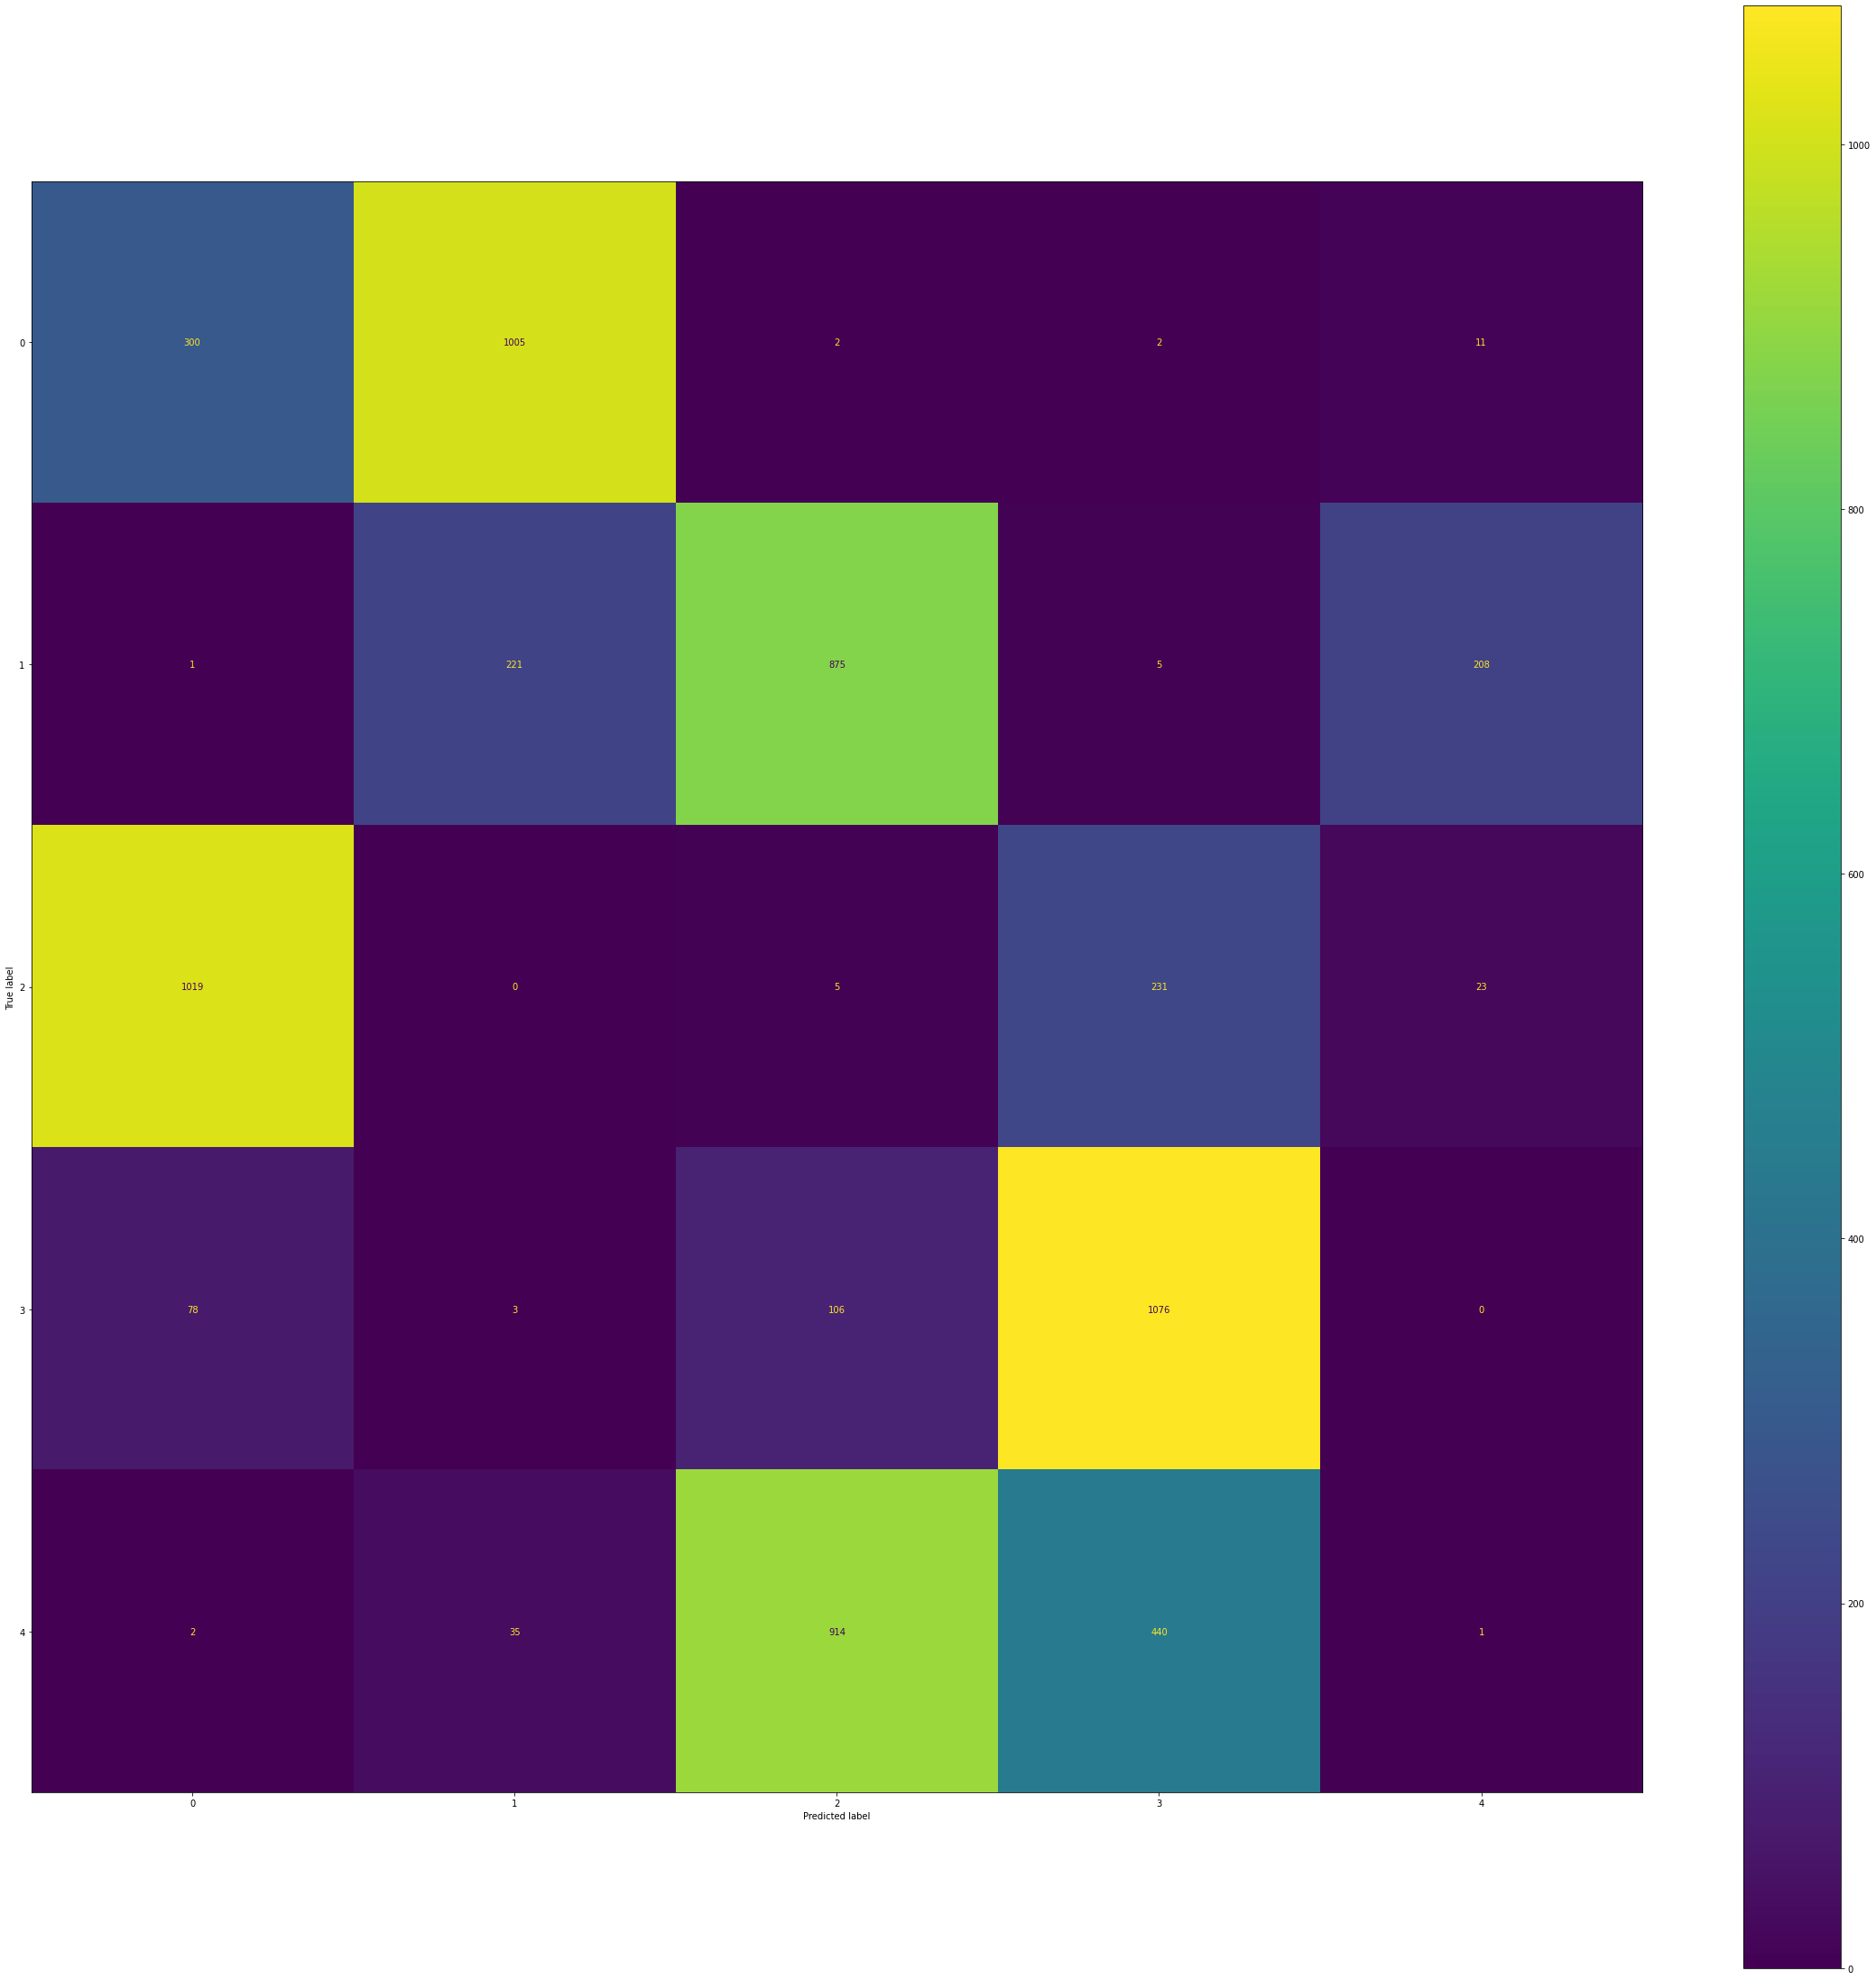

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
%matplotlib inline

confusion_matrix = confusion_matrix(y_true=dataset_val['감정_소분류'], y_pred=pred_y_label, labels=cm_label) 

disp = ConfusionMatrixDisplay(confusion_matrix)
fig, ax = plt.subplots(figsize=(40,40))
disp.plot(ax=ax)
#plt.savefig('finbert.png')
plt.show()

In [ ]:
for i in range(len(label_dic)):
  for j in range(len(label_dic)):
    if confusion_matrix[i][i]/confusion_matrix[i].sum() < 0.5 and i!=j and confusion_matrix[i][j]/confusion_matrix[i].sum()>0.1:
      print(label_dic[i] +'(이)랑 '+label_dic[j]+'(은)는 나누기 애매합니다.')

편안한(이)랑 흥분(은)는 나누기 애매합니다.
흥분(이)랑 감사하는(은)는 나누기 애매합니다.
흥분(이)랑 만족스러운(은)는 나누기 애매합니다.
감사하는(이)랑 편안한(은)는 나누기 애매합니다.
감사하는(이)랑 느긋(은)는 나누기 애매합니다.
만족스러운(이)랑 감사하는(은)는 나누기 애매합니다.
만족스러운(이)랑 느긋(은)는 나누기 애매합니다.


In [ ]:
dataset_val[dataset_val['감정_소분류']=='안달하는']

,감정_소분류,사람문장,label


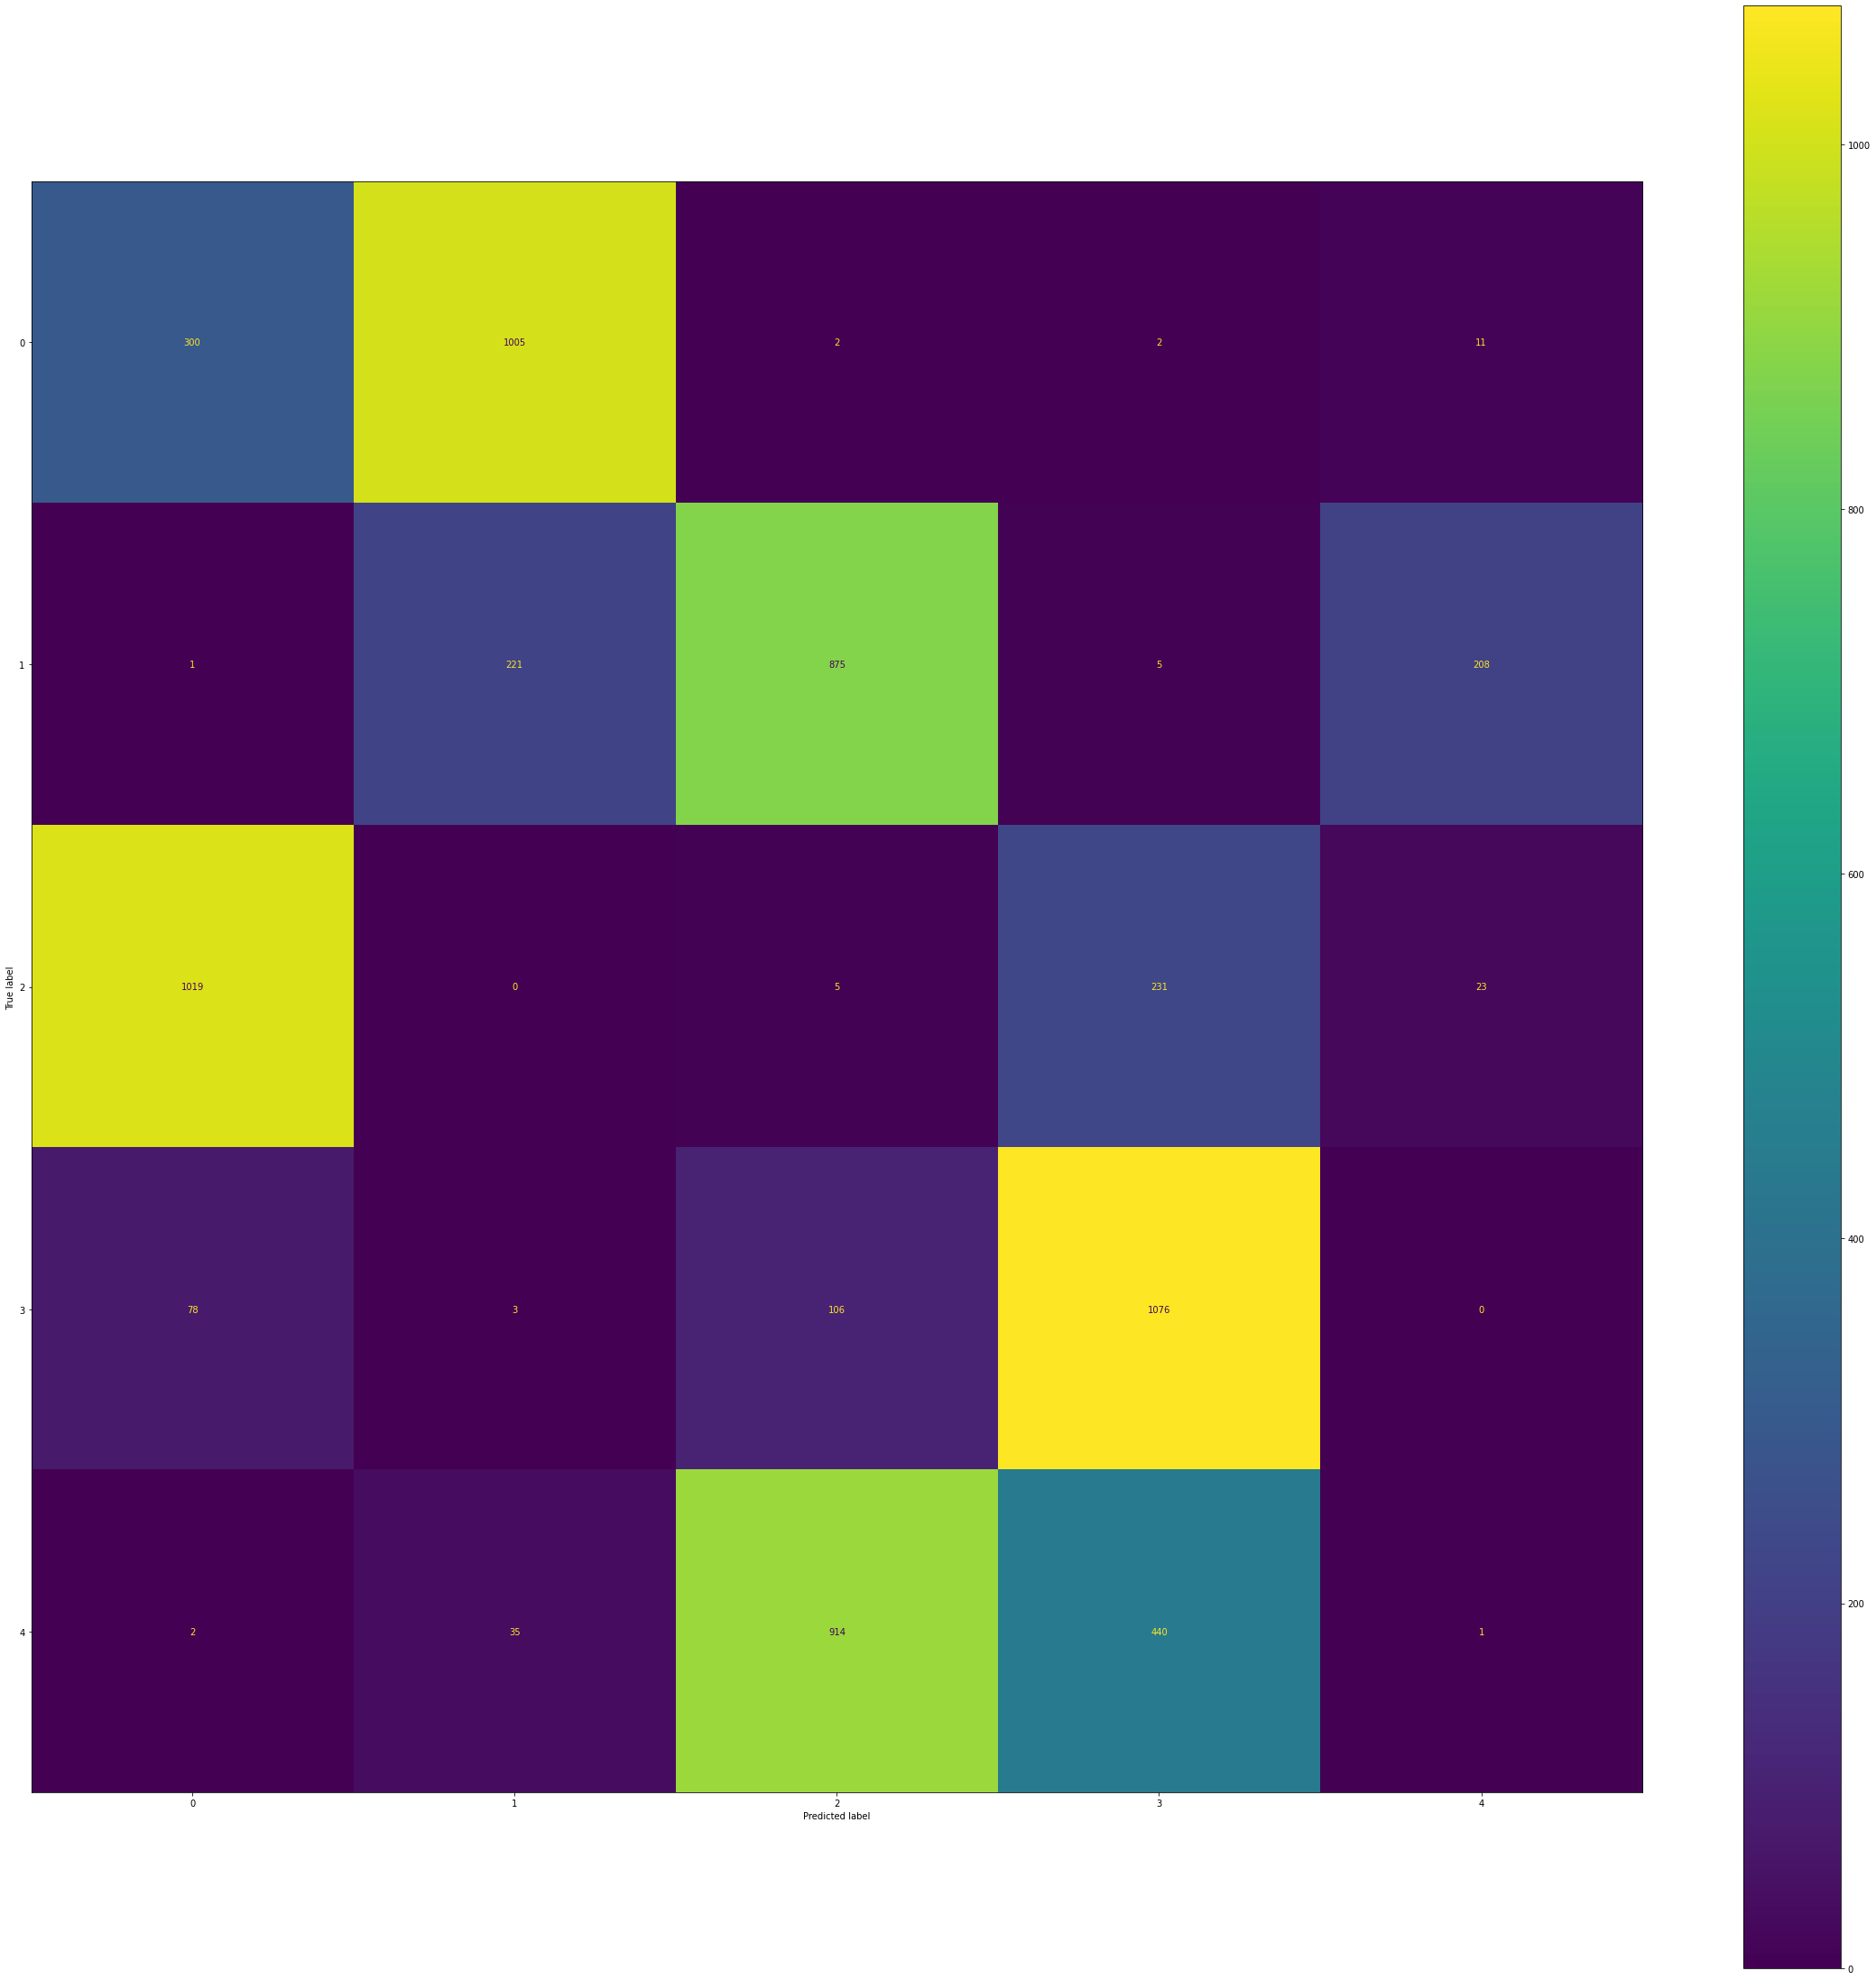

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
%matplotlib inline

confusion_matrix = confusion_matrix(y_true=dataset_val['감정_소분류'], y_pred=pred_y_label, labels=cm_label) 

disp = ConfusionMatrixDisplay(confusion_matrix)
fig, ax = plt.subplots(figsize=(40,40))
disp.plot(ax=ax)
#plt.savefig('finbert.png')
plt.show()

In [ ]:
for i in range(len(label_dic)):
  for j in range(len(label_dic)):
    if confusion_matrix[i][i]/confusion_matrix[i].sum() < 0.5 and i!=j and confusion_matrix[i][j]/confusion_matrix[i].sum()>0.1:
      print(label_dic[i] +'(이)랑 '+label_dic[j]+'(은)는 나누기 애매합니다.')

편안한(이)랑 흥분(은)는 나누기 애매합니다.
흥분(이)랑 감사하는(은)는 나누기 애매합니다.
흥분(이)랑 만족스러운(은)는 나누기 애매합니다.
감사하는(이)랑 편안한(은)는 나누기 애매합니다.
감사하는(이)랑 느긋(은)는 나누기 애매합니다.
만족스러운(이)랑 감사하는(은)는 나누기 애매합니다.
만족스러운(이)랑 느긋(은)는 나누기 애매합니다.
